In [9]:
from scipy import stats
stats.binom(n=1,p=0.5).rvs(size=1)
#stats.bernoulli(p=0.5).rvs(size=1)

array([0])

In [18]:
for i in range(10):
    if stats.binom(n=1,p=0.5).rvs(size=1) == 1:
        print('I print when `i` is', i)

I print when `i` is 0
I print when `i` is 3
I print when `i` is 4
I print when `i` is 6
I print when `i` is 8
I print when `i` is 9


In [11]:
alpha,beta,n,x=1,1,10,5 # I just made these numbers up
beta_distribution = stats.beta(a=1,b=1)
beta_distribution.pdf(0.5)

0.9999999999999996

In [12]:
alpha_A, beta_A = 1, 1 
alpha_B, beta_B = 1, 1  
alpha_C, beta_C = 1, 1  

def simulate_round(alpha, beta, true_p):
    outcome = stats.binom(n=1, p=true_p).rvs(size=1)
    if outcome == 1: 
        alpha += 1
    else: 
        beta += 1
    return alpha, beta

true_p_A = 0.7 
true_p_B = 0.5 
true_p_C = 0.3

num_rounds = 100

for _ in range(num_rounds):
    sample_A = stats.beta(alpha_A, beta_A).rvs()
    sample_B = stats.beta(alpha_B, beta_B).rvs()
    sample_C = stats.beta(alpha_C, beta_C).rvs()

    if max(sample_A, sample_B, sample_C) == sample_A:
        alpha_A, beta_A = simulate_round(alpha_A, beta_A, true_p_A)
    elif max(sample_A, sample_B, sample_C) == sample_B:
        alpha_B, beta_B = simulate_round(alpha_B, beta_B, true_p_B)
    else:
        alpha_C, beta_C = simulate_round(alpha_C, beta_C, true_p_C)

print(f"Final beliefs for A: alpha = {alpha_A}, beta = {beta_A}")
print(f"Final beliefs for B: alpha = {alpha_B}, beta = {beta_B}")
print(f"Final beliefs for C: alpha = {alpha_C}, beta = {beta_C}")

Final beliefs for A: alpha = 59, beta = 28
Final beliefs for B: alpha = 6, beta = 7
Final beliefs for C: alpha = 1, beta = 5


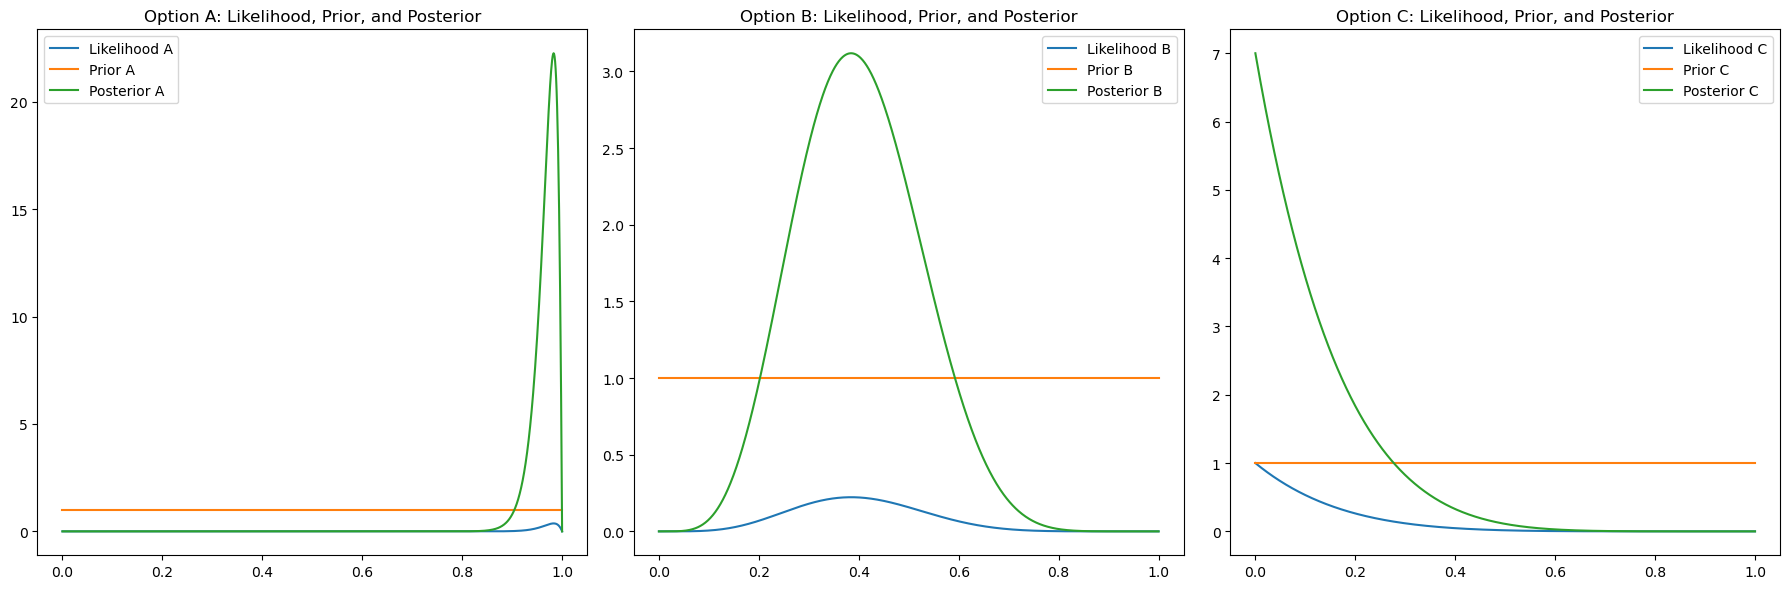

In [17]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

n_A, x_A = 59, 58  
n_B, x_B = 6 + 7, 6 - 1  
n_C, x_C = 1 + 5, 1 - 1  

alpha_A, beta_A = 1, 1
alpha_B, beta_B = 1, 1
alpha_C, beta_C = 1, 1 

parameter_domain = np.linspace(0, 1, 1001)

likelihood_A = stats.binom.pmf(n=n_A, k=x_A, p=parameter_domain)
likelihood_B = stats.binom.pmf(n=n_B, k=x_B, p=parameter_domain)
likelihood_C = stats.binom.pmf(n=n_C, k=x_C, p=parameter_domain)

prior_A = stats.beta(a=alpha_A, b=beta_A).pdf(parameter_domain)
prior_B = stats.beta(a=alpha_B, b=beta_B).pdf(parameter_domain)
prior_C = stats.beta(a=alpha_C, b=beta_C).pdf(parameter_domain)

posterior_A = stats.beta(a=x_A+alpha_A, b=n_A-x_A+beta_A).pdf(parameter_domain)
posterior_B = stats.beta(a=x_B+alpha_B, b=n_B-x_B+beta_B).pdf(parameter_domain)
posterior_C = stats.beta(a=x_C+alpha_C, b=n_C-x_C+beta_C).pdf(parameter_domain)

plt.figure(figsize=(18, 6))

# Option A
plt.subplot(1, 3, 1)
plt.plot(parameter_domain, likelihood_A, label="Likelihood A")
plt.plot(parameter_domain, prior_A, label="Prior A")
plt.plot(parameter_domain, posterior_A, label="Posterior A")
plt.title("Option A: Likelihood, Prior, and Posterior")
plt.legend()

# Option B
plt.subplot(1, 3, 2)
plt.plot(parameter_domain, likelihood_B, label="Likelihood B")
plt.plot(parameter_domain, prior_B, label="Prior B")
plt.plot(parameter_domain, posterior_B, label="Posterior B")
plt.title("Option B: Likelihood, Prior, and Posterior")
plt.legend()

# Option C
plt.subplot(1, 3, 3)
plt.plot(parameter_domain, likelihood_C, label="Likelihood C")
plt.plot(parameter_domain, prior_C, label="Prior C")
plt.plot(parameter_domain, posterior_C, label="Posterior C")
plt.title("Option C: Likelihood, Prior, and Posterior")
plt.legend()

plt.tight_layout()
plt.show()

# Interpretation of the Data:
## Option A:
The alpha value of 59 suggests 58 successes (since the initial value was 1), and the beta value of 28 suggests 27 failures.
This indicates a relatively high success rate compared to the other options.
The graph shows a narrow and high peak, indicating strong confidence in a high success rate.
## Option B:
The alpha value of 6 indicates 5 successes, and the beta value of 7 indicates 6 failures.
This suggests a success rate lower than Option A but better than Option C.
The graph displays a wider and lower peak compared to Option A, reflecting less confidence and a moderate success rate.
## Option C:
The alpha value of 1 indicates no successes (as it started from 1), and the beta value of 5 indicates 4 failures.
This indicates the lowest success rate among the three options.
The graph shows a peak near the lower end of the scale, further confirming the low success probability.

## Calculation of Means:
Mean for A ≈ 0.68
Mean for B ≈ 0.46
Mean for C ≈ 0.17
Based on these calculations, Option A has the highest expected success rate and would be the most rational choice for the next trial. The graph visually reinforces this decision, showing a much stronger belief in the success of Option A compared to the other options.